<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

/Users/yilonghao/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


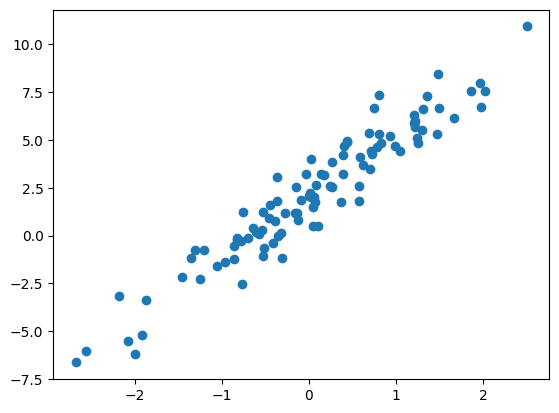

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

TRUE_W = 3.0
TRUE_b = 2.0
NUM_SAMPLES = 100

# 初始化随机数据
X = tf.random.normal(shape=[NUM_SAMPLES, 1]).numpy()
noise = tf.random.normal(shape=[NUM_SAMPLES, 1]).numpy()
y = X * TRUE_W + TRUE_b + noise  # 添加噪声

plt.scatter(X, y)

In [2]:
class Model(object):
    def __init__(self):
        self.W = tf.Variable(tf.random.uniform([1]))  # 随机初始化参数
        self.b = tf.Variable(tf.random.uniform([1]))

    def __call__(self, x):
        return self.W * x + self.b  # w*x + b

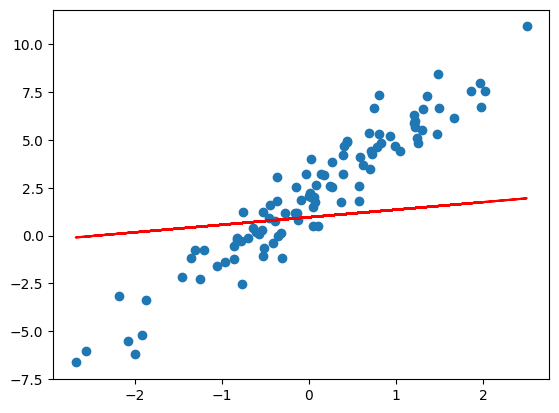

In [3]:
model = Model()  # 实例化模型

plt.scatter(X, y)
plt.plot(X, model(X), c='r')

In [4]:
def loss_fn(model, x, y):
    y_ = model(x)
    return tf.reduce_mean(tf.square(y_ - y))

In [5]:
EPOCHS = 10
LEARNING_RATE = 0.1

for epoch in range(EPOCHS):  # 迭代次数
    with tf.GradientTape() as tape:  # 追踪梯度
        loss = loss_fn(model, X, y)  # 计算损失
    dW, db = tape.gradient(loss, [model.W, model.b])  # 计算梯度
    model.W.assign_sub(LEARNING_RATE * dW)  # 更新梯度
    model.b.assign_sub(LEARNING_RATE * db)
    # 输出计算过程
    print('Epoch [{}/{}], loss [{:.3f}], W/b [{:.3f}/{:.3f}]'.format(epoch, EPOCHS, loss,
                                                                     float(model.W.numpy()),
                                                                     float(model.b.numpy())))

Epoch [0/10], loss [10.824], W/b [1.010/1.203]
Epoch [1/10], loss [6.932], W/b [1.487/1.394]
Epoch [2/10], loss [4.586], W/b [1.858/1.541]
Epoch [3/10], loss [3.172], W/b [2.146/1.655]
Epoch [4/10], loss [2.320], W/b [2.370/1.743]
Epoch [5/10], loss [1.806], W/b [2.544/1.811]
Epoch [6/10], loss [1.496], W/b [2.679/1.863]
Epoch [7/10], loss [1.310], W/b [2.784/1.904]
Epoch [8/10], loss [1.197], W/b [2.865/1.935]
Epoch [9/10], loss [1.130], W/b [2.929/1.959]


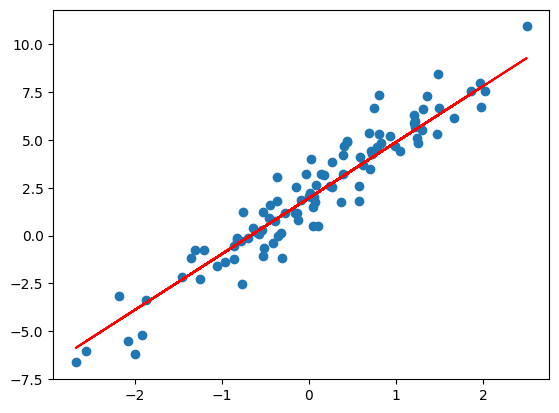

In [6]:
plt.scatter(X, y)
plt.plot(X, model(X), c='r')

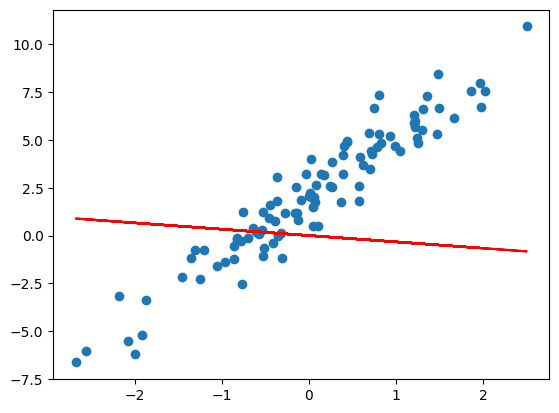

In [7]:
model = tf.keras.layers.Dense(units=1)  # 实例化线性层
plt.scatter(X, y)
plt.plot(X, model(X), c='r')

In [8]:
model.variables

[<KerasVariable shape=(1, 1), dtype=float32, path=dense/kernel>,
 <KerasVariable shape=(1,), dtype=float32, path=dense/bias>]

In [10]:
print(tf.__version__)

2.16.1


In [25]:
EPOCHS = 10
LEARNING_RATE = 0.1
for epoch in range(EPOCHS):  # 迭代次数
    with tf.GradientTape() as tape:  # 追踪梯度
        y_ = model(X)
        loss = tf.reduce_sum(tf.compat.v1.losses.mean_squared_error(y, y_))
    grads = tape.gradient(loss, model.variables)  # 计算梯度
    optimizer = tf.keras.optimizers.SGD(LEARNING_RATE)  # 随机梯度下降
    optimizer.apply_gradients(zip(grads, model.variables))  # 更新梯度

    print('Epoch [{}/{}], loss [{:.3f}]'.format(epoch, EPOCHS, loss))

Epoch [0/10], loss [3.303]
Epoch [1/10], loss [2.400]
Epoch [2/10], loss [1.855]
Epoch [3/10], loss [1.526]
Epoch [4/10], loss [1.328]
Epoch [5/10], loss [1.209]
Epoch [6/10], loss [1.136]
Epoch [7/10], loss [1.093]
Epoch [8/10], loss [1.067]
Epoch [9/10], loss [1.051]


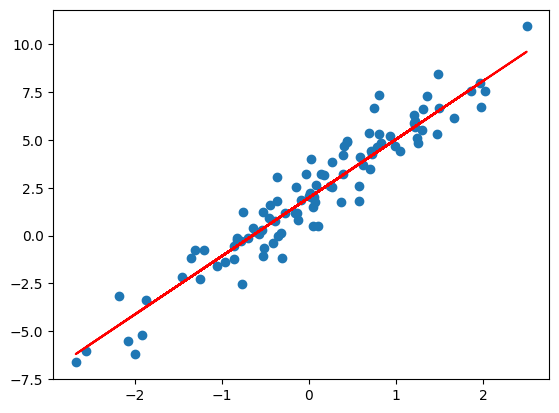

In [26]:
plt.scatter(X, y)
plt.plot(X, model(X), c='r')

In [30]:
model.variables

[<KerasVariable shape=(1, 1), dtype=float32, path=dense/kernel>,
 <KerasVariable shape=(1,), dtype=float32, path=dense/bias>]

In [34]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_dim=1))
model.summary()  # 查看模型结构

/Users/yilonghao/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [35]:
model.compile(optimizer='sgd', loss='mse')
model.fit(X, y, steps_per_epoch=1000)

1000/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 50us/step - loss: 2.9022   


2024-05-02 13:23:59.304118: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/contextlib.py:135: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(type, value, traceback)


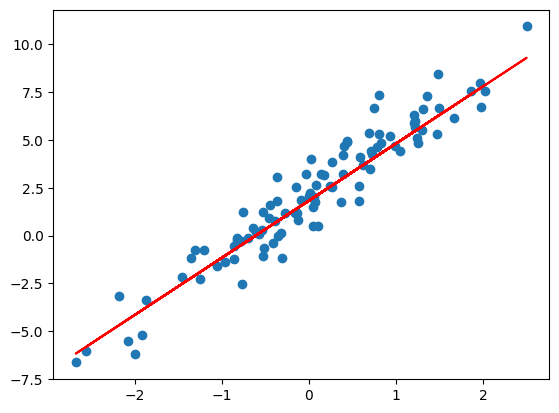

In [36]:
plt.scatter(X, y)
plt.plot(X, model(X), c='r')